In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# cosas por hacer:
 - color map - ok
 - df 3d plot - ok
 - mover legend - ok
 - phyphox + load cell
 - rotar ejes para que quede similar a la foto - ok
 - hacer chequeo de coordenadas y limpieza de dataframe
 - surface?
 - cómputo de strain - elementos Q4?
 - grafica 3d con colores... quitar contorno, mapear con strain.

In [2]:
glob.glob(r'..\*')

['..\\ArUco_DIC',
 '..\\Data',
 '..\\depthai-python',
 '..\\main.py',
 '..\\muDIC_tests',
 '..\\NIDAQ_tests',
 '..\\Processing',
 '..\\run_all.py',
 '..\\venv']

In [2]:
data_folder = '..\\Data'
glob.glob(data_folder+'\*')

['..\\Data\\19 Apr 2022 15_25_10',
 '..\\Data\\19 Apr 2022 15_29_32',
 '..\\Data\\20 Mar 2022 17_54_30',
 '..\\Data\\20 Mar 2022 18_28_21',
 '..\\Data\\20 Mar 2022 18_36_59',
 '..\\Data\\20 Mar 2022 23_10_22',
 '..\\Data\\21 Mar 2022 11_12_02',
 '..\\Data\\21 Mar 2022 11_15_25',
 '..\\Data\\21 Mar 2022 12_32_21',
 '..\\Data\\21 Mar 2022 12_35_22',
 '..\\Data\\21 Mar 2022 14_01_13',
 '..\\Data\\21 Mar 2022 14_03_23',
 '..\\Data\\21 Mar 2022 15_20_40',
 '..\\Data\\21 Mar 2022 16_14_27',
 '..\\Data\\21 Mar 2022 17_09_04',
 '..\\Data\\21 Mar 2022 17_16_48',
 '..\\Data\\21 Mar 2022 17_47_41',
 '..\\Data\\21 Mar 2022 17_48_44',
 '..\\Data\\21 Mar 2022 18_32_00',
 '..\\Data\\21 Mar 2022 18_32_43',
 '..\\Data\\Test_19 Apr 2022 15_52_30',
 '..\\Data\\Test_19 Apr 2022 15_53_14',
 '..\\Data\\Test_19 Apr 2022 15_55_32',
 '..\\Data\\Test_19 Apr 2022 16_11_31',
 '..\\Data\\Test_21 Mar 2022 17_57_02',
 '..\\Data\\Test_21 Mar 2022 18_02_44',
 '..\\Data\\Test_21 Mar 2022 18_04_16',
 '..\\Data\\Test_21 

In [2]:
folder_path = '..\\Data\\Test_19 Apr 2022 16_11_31'
paths = glob.glob(os.path.join(folder_path,'*'))

In [4]:
paths

['..\\Data\\Test_19 Apr 2022 16_11_31\\ArUco_Data.csv',
 '..\\Data\\Test_19 Apr 2022 16_11_31\\video']

In [3]:
df = pd.read_csv(paths[0])
df

,time,4_X,4_Y,4_Z,8_X,8_Y,8_Z,12_X,12_Y,12_Z,...,13_Z,6_X,6_Y,6_Z,10_X,10_Y,10_Z,1_X,1_Y,1_Z
0,1.650399e+09,23.0,-62.0,494.0,2.0,-58.0,496.0,-20.0,-56.0,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.650399e+09,-54.0,-69.0,657.0,0.0,0.0,0.0,0.0,0.0,0.0,...,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.650399e+09,21.0,-56.0,445.0,1.0,-53.0,448.0,-18.0,-50.0,452.0,...,467.0,6.0,-14.0,450.0,-13.0,-12.0,453.0,31.0,-1.0,457.0
3,1.650399e+09,21.0,-56.0,445.0,1.0,-53.0,448.0,-18.0,-50.0,452.0,...,468.0,6.0,-14.0,451.0,-13.0,-12.0,453.0,31.0,-1.0,457.0
4,1.650399e+09,21.0,-56.0,446.0,1.0,-53.0,448.0,-18.0,-50.0,452.0,...,467.0,6.0,-14.0,451.0,-13.0,-12.0,454.0,31.0,-1.0,457.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,1.650399e+09,22.0,-109.0,475.0,3.0,-108.0,481.0,-17.0,-105.0,483.0,...,NaN,8.0,-69.0,491.0,-12.0,-68.0,495.0,32.0,-60.0,502.0
1767,1.650399e+09,11.0,-58.0,506.0,22.0,-109.0,475.0,3.0,-108.0,481.0,...,NaN,28.0,-71.0,487.0,8.0,-69.0,491.0,-31.0,-66.0,497.0
1768,1.650399e+09,22.0,-109.0,475.0,3.0,-108.0,481.0,-17.0,-105.0,483.0,...,508.0,8.0,-69.0,491.0,-12.0,-68.0,495.0,32.0,-59.0,499.0
1769,1.650399e+09,22.0,-109.0,475.0,3.0,-108.0,481.0,-17.0,-105.0,483.0,...,NaN,8.0,-69.0,490.0,-12.0,-68.0,495.0,32.0,-60.0,505.0


In [10]:
df.columns

Index(['time', '4_X', '4_Y', '4_Z', '8_X', '8_Y', '8_Z', '5_X', '5_Y', '5_Z',
       '3_X', '3_Y', '3_Z', '1_X', '1_Y', '1_Z', '9_X', '9_Y', '9_Z', '6_X',
       '6_Y', '6_Z', '2_X', '2_Y', '2_Z', '7_X', '7_Y', '7_Z'],
      dtype='object')

In [11]:
for col in ['4_X', '4_Y', '4_Z', '8_X', '8_Y', '8_Z', '5_X', '5_Y', '5_Z',
       '3_X', '3_Y', '3_Z', '1_X', '1_Y', '1_Z', '9_X', '9_Y', '9_Z', '6_X',
       '6_Y', '6_Z', '2_X', '2_Y', '2_Z', '7_X', '7_Y', '7_Z']:
    print(col,len(df[~pd.isnull(df[col])]))

4_X 550
4_Y 550
4_Z 550
8_X 583
8_Y 583
8_Z 583
5_X 615
5_Y 615
5_Z 615
3_X 120
3_Y 120
3_Z 120
1_X 577
1_Y 577
1_Z 577
9_X 225
9_Y 225
9_Z 225
6_X 145
6_Y 145
6_Z 145
2_X 89
2_Y 89
2_Z 89
7_X 15
7_Y 15
7_Z 15


In [111]:
def plot_points(df,i):
    color_dict = {1:'lightcoral',2:'orangered',3:'sandybrown',4:'olive',5:'greenyellow',6:'darkseagreen',7:'green',8:'deepskyblue',9:'darkorchid',10:'rebeccapurple',11:'deeppink',12:'crimson',13:'pink',14:'turquoise',15:'cornflowerblue',16:'red'}
    s = df.loc[i].dropna()
    cols = s.index.tolist()
    cols.remove('time')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if len(cols)>0:
        legend = []
        for j in range(int(len(cols)/3)):
            n = int(cols[3*j].split('_')[0])
            ax.scatter(s[cols[3*j]], s[cols[1+3*j]], s[cols[2+3*j]],c=color_dict[n]) #, c=c, marker=m,  , n,colormap='gist_rainbow'
            legend.append(n)
        # plt.title(cols)
        ax.legend(legend)
        # ax.set_xlim(-50,50)
        # ax.set_ylim(-50,50)
        # ax.set_zlim(500,800)
        plt.show()
def plot_mesh(df,i,alpha = 30, beta = -30):
    s = df.loc[i].dropna()
    cols = s.index.tolist()
    cols.remove('time')
    if len(cols)>0:
        pts = []
        for j in range(int(len(cols)/3)):
            n = int(cols[3*j].split('_')[0])
            pts.append([s[cols[3*j]], s[cols[1+3*j]], s[cols[2+3*j]]])
    X, Y, Z = zip(*pts)
    X, Y, Z = np.array(X), np.array(Y), -np.array(Z)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_trisurf(X,Y,Z, linewidth=0.2, antialiased=True, cmap=cm.coolwarm)
    ax.view_init(alpha, beta, vertical_axis='y')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(f'i = {i}')
    plt.show()

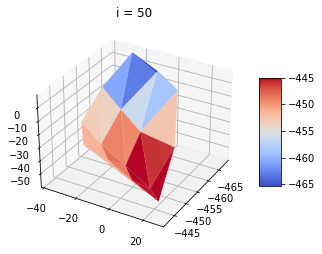

In [118]:
plot_mesh(df,50,30,30)

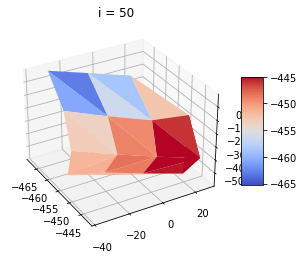

In [136]:
plot_mesh(df,50)

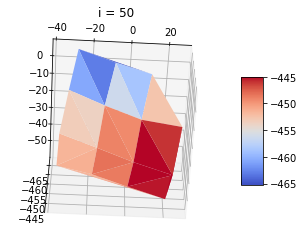

In [108]:
plot_mesh(df,50,120,273)

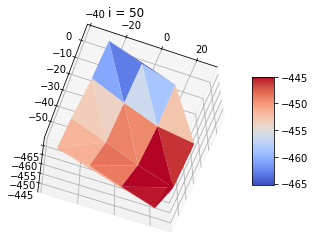

In [110]:
plot_mesh(df,50,120,290)

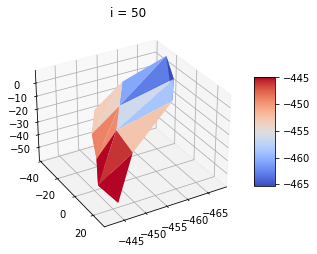

In [115]:
plot_mesh(df,50,30,60)

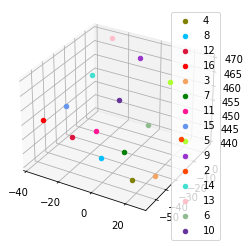

In [65]:
plot_points(df,50)

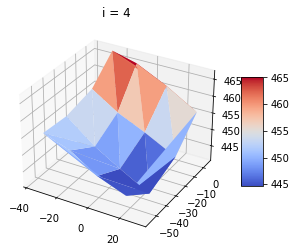

In [67]:
plot_mesh(df,4)

In [ ]:
plot_points(df,4)

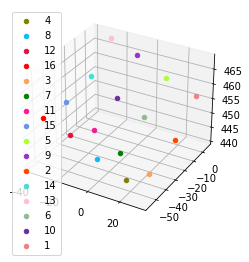

In [16]:
plot_points(df,6)

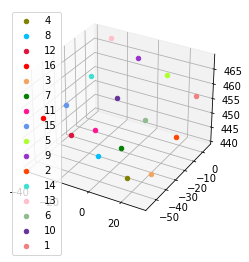

In [17]:
plot_points(df,10)

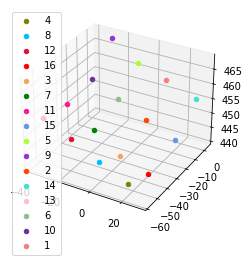

In [18]:
plot_points(df,300)

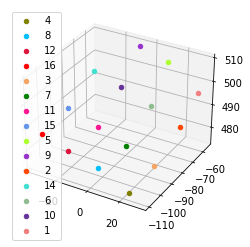

In [20]:
plot_points(df,1700)

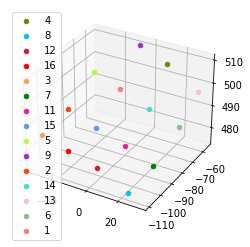

In [21]:
plot_points(df,1701)

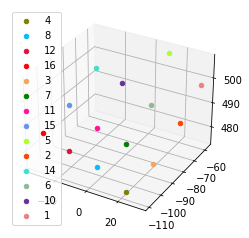

In [22]:
plot_points(df,1720)

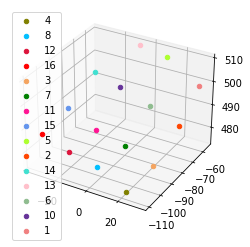

In [24]:
plot_points(df,1770)

In [29]:
df[-2:]

,time,4_X,4_Y,4_Z,8_X,8_Y,8_Z,12_X,12_Y,12_Z,...,13_Z,6_X,6_Y,6_Z,10_X,10_Y,10_Z,1_X,1_Y,1_Z
1769,1.650399e+09,22.0,-109.0,475.0,3.0,-108.0,481.0,-17.0,-105.0,483.0,...,NaN,8.0,-69.0,490.0,-12.0,-68.0,495.0,32.0,-60.0,505.0
1770,1.650399e+09,22.0,-109.0,475.0,3.0,-108.0,481.0,-17.0,-105.0,482.0,...,509.0,8.0,-69.0,491.0,-12.0,-68.0,495.0,32.0,-59.0,500.0


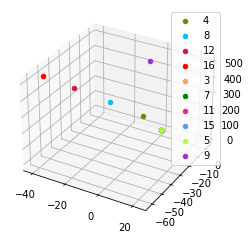

In [25]:
plot_points(df,0)

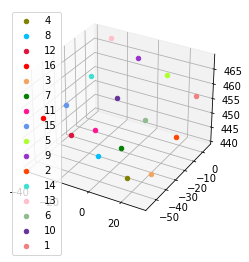

In [26]:
plot_points(df,10)

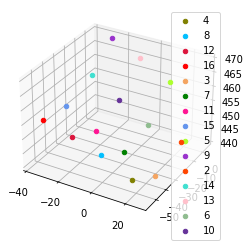

In [27]:
plot_points(df,12)

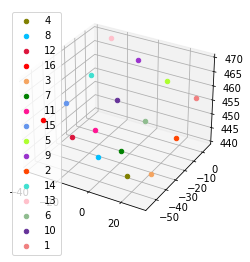

In [28]:
plot_points(df,40)

In [25]:
cols

['4_X',
 '4_Y',
 '4_Z',
 '8_X',
 '8_Y',
 '8_Z',
 '5_X',
 '5_Y',
 '5_Z',
 '3_X',
 '3_Y',
 '3_Z',
 '1_X',
 '1_Y',
 '1_Z',
 '9_X',
 '9_Y',
 '9_Z',
 '6_X',
 '6_Y',
 '6_Z']

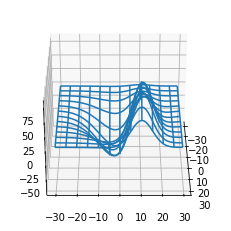

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [100]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)